# Oppgave bakterier
### Utskrifter

In [29]:
import matplotlib.pyplot as plt
import scipy.optimize as so
import numpy as np

def dy(y, k, w):
    return k*y + w

t = 0
bak_start = 100_000

y = bak_start
dt = 0.001
y_max = bak_start
y_max_t = 0

t_list = []
y_list = []

while y > 0:
    bak_form = 0.25*dt
    bak_kur = -10000*(t+1)*dt
    y += dy(y, bak_form, bak_kur)
    y_list.append(y)
    t_list.append(t)
    
    if y > y_max:
        y_max = y
        y_max_t = t
        
    t += dt
        
print(f"Det tar {t:0.3f} døgn før infeksjonen er over")
print(f"Det tar {y_max_t:0.3f} døgn før infeksjonen når toppen")

y = bak_start
bak_kur = 0
y2_list = []
t = 0

while t <= t_list[-1]:
    bak_form = 0.25*dt
    y += dy(y, bak_form, bak_kur)
    y2_list.append(y)
    
    t += dt
    
    
# Regresjon
def f(x, a, b, c):
    return a*x**2 + b*x + c

konstanter = so.curve_fit(f, t_list, y_list)[0]

a = konstanter[0]
b = konstanter[1]
c = konstanter[2]

print(f"Regresjonsmodell: {a:0.2f}x^2 + {b:0.2f}x + {c:0.2f}")

Det tar 5.886 døgn før infeksjonen er over
Det tar 1.880 døgn før infeksjonen når toppen
Regresjonsmodell: -6776.49x^2 + 24829.68x + 94862.77


### Graf

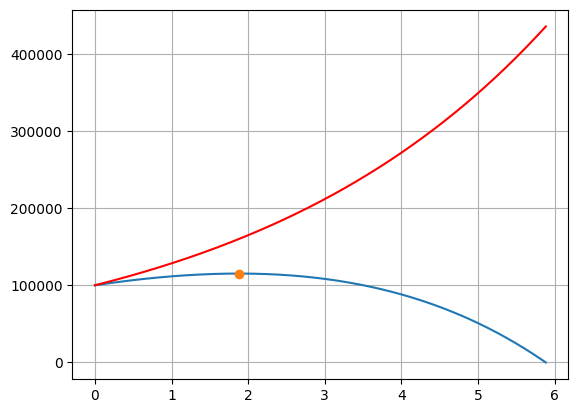

In [30]:

plt.plot(t_list, y_list)
plt.plot(y_max_t, y_max, "o")
plt.plot(t_list, y2_list, color = "r")
plt.plot()
plt.grid()
plt.show()

Dersom hun ikke tar medisinen kan vi se at hun aldri vil bli frisk, og vil bare bli sykere.